In [55]:
#1.A LCG is one of the simplest pseudorandom number generator algorithms.
#Formula, X1 = (a. X0 + c) mod m
# X1 = (multiplier * Seed + increment) mod Modulus
# Seed = X0, Multiplier = a, Increment = c, Modulus = m

x0,a,c,m = 27,17,43,100
rand_num = [] 

i=0
for i in range(10):
    temp = (a*x0 + c) % m
    rand_num.append(temp)
    x0 = temp

print(rand_num)

[2, 77, 52, 27, 2, 77, 52, 27, 2, 77]


In [56]:
#2.Finding the value of pi using Monte Carlo Method.
# Associated formulas are Pythagoras' Theorem and Buffon Needle's theorem
import numpy as np
import matplotlib.pyplot as plt

In [18]:
N = 10_000
inside = []
for i in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if(np.sqrt(x**2 + y**2) < 1):
        inside.append((x,y))

In [19]:
print(4*len(inside) / float(N))

3.142


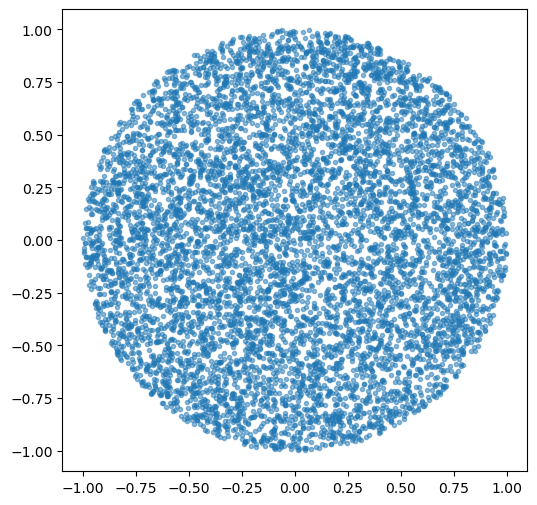

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.5);

In [32]:
#3. If we roll over 2 dices for 24 times. What is the probability of having two six by both dices. 
#Write a program to calculate this using Monte Carlo.

import numpy as np
def monte_carlo_simu():
    num_simulation = 1_00_000
    successful_simu = 0
    for i in range(num_simulation):
        arr_dices = np.random.randint(1,7,(24,2))
        for j in range(24):
            if(arr_dices[j][0] == arr_dices[j][1] == 6):
                successful_simu += 1
    return (successful_simu / num_simulation)



pr_of_two_sixes = monte_carlo_simu()
print(pr_of_two_sixes)

0.66264


In [1]:
#7.Poisson Probability
import numpy as np
import scipy.stats as st

test = int(input())

for i in range(test):
    avg = float(input("Enter average value : "))
    exp = float(input("Enter expected value : "))
    res = st.poisson.pmf(exp, avg)
    print("Case "+str(i)+" :"+ f"Probability is: {res: .6f}")

 3
Enter average value :  250
Enter expected value :  275


Case 0 :Probability is:  0.007169


Enter average value :  300
Enter expected value :  350


Case 1 :Probability is:  0.000409


Enter average value :  100
Enter expected value :  150


Case 2 :Probability is:  0.000001


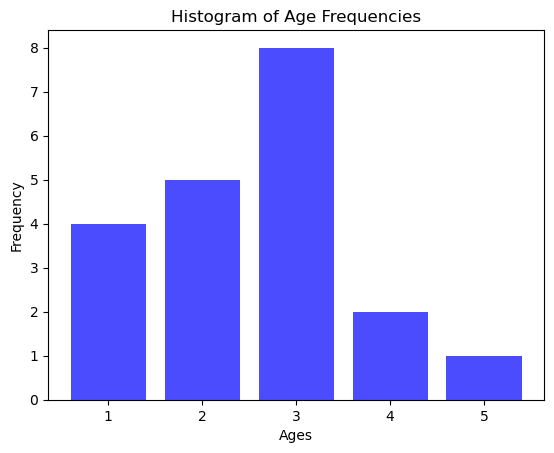

In [50]:
#10. Suppose there are 20 babies in a hospital... ... ...

from collections import Counter
import matplotlib.pyplot as plt
age = [1,1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,5]

freq = Counter(age)
x = list(freq.keys())
y = list(freq.values())
plt.bar(x, y, color='blue',alpha=0.7)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of Age Frequencies')
plt.xticks(x)  # Ensure all elements are shown on the x-axis
plt.show()

In [54]:
#9. 
#Standard Deviation
#Z scores

import math
import pandas as pd
data = [3,4,5,6,7,8,8,8,8,8,9,9,7,6,6,5,4,4,3,2]
mean = sum(data) / len(data)
variance = sum((x-mean)**2 for x in data) / (len(data)-1)
std_dev = math.sqrt(variance)

data_1 = pd.Series(data)
z_scores = (data_1 - mean) / std_dev

print("Original Data:\n", data)
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Z-Scores:\n", z_scores)


Original Data:
 [3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 7, 6, 6, 5, 4, 4, 3, 2]
Mean: 6.0
Standard Deviation: 2.1521103473958814
Z-Scores:
 0    -1.393981
1    -0.929320
2    -0.464660
3     0.000000
4     0.464660
5     0.929320
6     0.929320
7     0.929320
8     0.929320
9     0.929320
10    1.393981
11    1.393981
12    0.464660
13    0.000000
14    0.000000
15   -0.464660
16   -0.929320
17   -0.929320
18   -1.393981
19   -1.858641
dtype: float64


In [7]:
#There are 32 random data...fits in Normal distribution or NOT. Critical value 24% #
import math

data = [67, 63, 33, 69, 53, 51, 49, 78, 77, 83, 47, 53, 51, 49, 78, 77,
        83, 47, 67, 63, 33, 69, 53, 51, 49, 78, 77, 83, 47, 53, 51, 49]

num_bins = 6

min_data, max_data = min(data), max(data)
bin_width = (max_data - min_data) / num_bins
bins = [min_data + i * bin_width for i in range(num_bins + 1)]
observed_freq = [0] * num_bins

for value in data:
    for i in range(num_bins):
        if bins[i] <= value < bins[i + 1]:
            observed_freq[i] += 1
            break
        elif value == max_data: 
            observed_freq[-1] += 1

mean = sum(data) / len(data)
variance = sum((x - mean) ** 2 for x in data) / len(data)
std_dev = math.sqrt(variance)

expected_freq = []
for i in range(num_bins):
    lower_bound = (bins[i] - mean) / std_dev
    upper_bound = (bins[i + 1] - mean) / std_dev
    expected_prob = (math.erf(upper_bound / math.sqrt(2)) - math.erf(lower_bound / math.sqrt(2))) / 2
    expected_freq.append(expected_prob * len(data))


chi_square_statistic = sum(((observed_freq[i] - expected_freq[i]) ** 2) / expected_freq[i] for i in range(num_bins))

degrees_of_freedom = num_bins - 1 - 2

alpha = 0.24
critical_value = 17.535 

print("Observed Frequencies:", observed_freq)
print("Expected Frequencies:", expected_freq)
print("Chi-Square Statistic:", chi_square_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("Critical Value:", critical_value)

if chi_square_statistic < critical_value:
    print("Fail to reject the null hypothesis: Data fits the normal distribution")
else:
    print("Reject the null hypothesis: Data does not fit the normal distribution")

Observed Frequencies: [2, 7, 8, 2, 4, 24]
Expected Frequencies: [2.074883470806988, 4.346456625038188, 6.583704663665678, 7.211953637877308, 5.713407146286517, 3.273153402560906]
Chi-Square Statistic: 137.45805160202306
Degrees of Freedom: 3
Critical Value: 17.535
Reject the null hypothesis: Data does not fit the normal distribution
